# Week 1 Lab: The algebra behind a neuron and training process

It's time for us to find out what neural networks are made of! :D 

We will put in practice what you have learned in the last class. We will build the perceptron algorithm from scratch, see how it learns, and how you can use it to make better decisions based in data.

In [2]:
# Package imports
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
from sklearn import datasets

# Display plots inline and change default figure size
matplotlib.rc('figure', figsize=(5, 5))

## The perceptron

In the last class, we learned how the perceptron works. But let's go for a quick recap:

The perceptron, as proposed by Rosenblatt, is an algorithm for learning a binary classifier algorithm called threshold function, a function that maps an input $x$ to a binary output value $f(x)$, which can be either 0 or 1.

\begin{equation*}
f(x) = \begin{cases}
1 &\text{if $y + b > 0$}\\
0 &\text{otherwise}
\end{cases}
\end{equation*}

Where $b$ is the bias and $y$ is the dot product $\sum\limits_{i=1}^{n} x_i w_i$, where $w$ are the weights and $x$ are the inputs.

It is important to know that this function is commonly found in simple perceptrons such as this one, and that more robust neural networks use other kinds of activation functions.

![The perceptron](https://upload.wikimedia.org/wikipedia/commons/f/ff/Rosenblattperceptron.png)

Let's put that in practice! Below, there is an implementation of the perceptron algorithm along with detailed explanation. It may feel a little weird at the beginning, but it's easier than it seems! :D

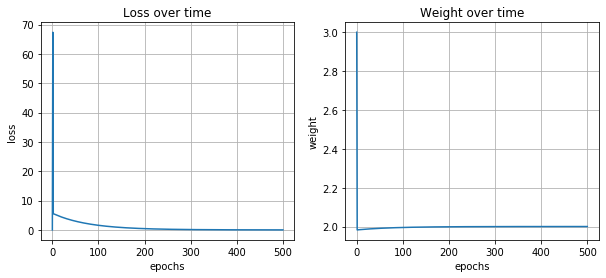

In [3]:
# In this example, we are coding a simple neuron with 1 input and a bias
import numpy as np

# First, you need to choose your initial values:
weight = 3
bias = 1
learning_rate = 0.002
epochs = 500
loss = 0

# Now we are generating a very simple dataset to be able to train our neuron
inputs = np.array(range(50))
ground_truths = inputs * 2

# Store the losses here so we can display a graphic
loss_over_epochs = [loss]

# Store the weigths here so we can show they updating as the epochs pass
weights_over_epochs = [weight]

# This will run for the specified amount of epochs. In this case, 500
for epoch in range(epochs):
  accumulated_loss = 0
  for index, input in enumerate(inputs): # for each element inside the inputs array:
    guess_value = (weight * input) + bias # multiply the weight for the input, and add the bias;
    loss = guess_value - ground_truths[index] # calculate loss by subtracting the predicted value from the ground truth
    weight = weight - input*loss*learning_rate # Update the weight. Note how the learning rate influenciates this.
    bias = bias - loss*learning_rate # Update the bias. Learning rate is also very important here.
    accumulated_loss = accumulated_loss + loss
  weights_over_epochs.append(weight)  
  loss_over_epochs.append(accumulated_loss)

# Plot the loss over the epochs in a graph
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(range(epochs+1),loss_over_epochs)
axes[0].set(xlabel='epochs', ylabel='loss', title='Loss over time')
axes[0].grid()

# Plot the weight over the epochs
axes[1].plot(range(epochs+1),weights_over_epochs)
axes[1].set(xlabel='epochs', ylabel='weight', title='Weight over time')
axes[1].grid()
plt.show()

In the graphs above, we can see how the loss lowered over the time, and how the weights were adjusted.

Now let's use it to predict some values from the same dataset we used to train the perceptron.
Please note that this is not a good approach, and we are only doing it for the sake of simplicity.

But before doing it, let's take a look at our datasets:

In [4]:
print(inputs)
print(ground_truths)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]


If you pay some attention to our datasets, you will notice that our ground truths have been always the double of the input. So, for example: 48 is 96, 49 is 98. Can you guess what our model will predict for the next number in that sequence?

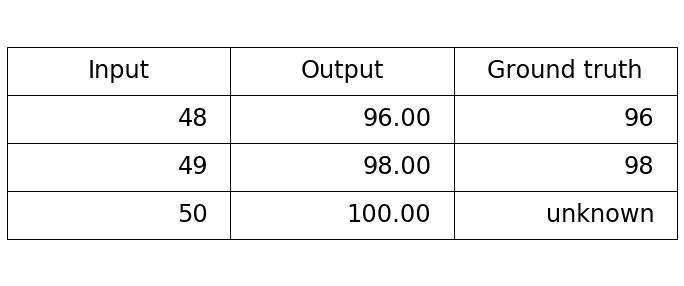

In [6]:
# First, let's write our predict function so we can easily guess some data:
def predict(input):
    return format((weight * input) + bias, '.2f')

# Now, let's take the last two numbers from our original dataset, predict their values, and check its accuracy.
values = []
amount = 2 # if you want to add more numbers to the table, just change this number :)
for index in range(amount,0,-1):
    input = inputs.take(-index)
    truth = ground_truths.take(-index)
    values.append([input, predict(input), truth])
    
# Now we will predict a number that doesn't exist in our datasets, so we don't know its ground truth.
values.append([inputs.take(-1) + 1, predict(inputs.take(-1) + 1), "unknown"])

# Code below just generates the table, don't bother with it.
fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['Input', 'Output', 'Ground truth']
table_vals = values

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 3,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(8, 4)

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)

# Practice time!

Now that the concepts are fresh in your head, it's time to write a perceptron and use it to classify a more complex dataset. We will generate the dataset using sci-kit learn, write another perceptron, but implementing the step function this time. After that, we will split our dataset into training and test datasets, train our perceptron, classify our test dataset, and measure the performance.

## Generating some data

We will generate our data using a dataset generator from sci-kit learn. We will use the [make moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, because it will generate a dataset that is hard to classify using only a single line. Then, we will classify it with our perceptron, and evaluate the results.

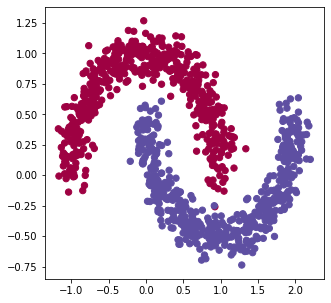

In [5]:
 # Generate a dataset and plot it
np.random.seed(0)
samples, features = sklearn.datasets.make_moons(1000, noise=0.1)
plt.scatter(samples[:,0], samples[:,1], s=40, c=features, cmap=plt.cm.Spectral)

The dataset we just generated has two classes: blue dots, and red dots. The goal here is to draw an area separating the blue dots from the red dots. When we have this area, we can predict if a new point in this graph will be a red dot or a blue dot, depending of which area it is located at.

Now, it is time for some code! Let's Implement the perceptron algorithm below.

In [6]:
class Perceptron(object):

    def __init__(self, no_of_inputs, epochs, learning_rate, bias=1):
        self.epochs = epochs
        self.bias = bias
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + bias)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0 
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

print("Model loaded and ready to roll")

Model loaded and ready to roll


## Training the perceptron

Now we will use this perceptron to classify the data we generated in the beginning of this notebook. First of all, let's separate our data into training and test datasets.

In [7]:
training_samples, test_samples, training_features, test_features = model_selection.train_test_split(samples, features, train_size=0.75,test_size=0.25, random_state=101)
print("Training and test datasets were extracted.")

Training and test datasets were extracted.


Now we will use our training dataset to train the perceptron. You can play around with the epochs and learning rate parameters and see if they will improve the performance of your model.

In [8]:
epochs = 100
learning_rate = 0.001

perceptron = Perceptron(2,epochs,learning_rate)
perceptron.train(training_samples, training_features)
print("Model trained")

Model trained


Now, let's classify some data from the test dataset, compare our predictions to the actual values and calculate the performance!

In [9]:
# Runs the model through the test dataset
correct_results = 0
predictions = []

for inputs, ground_truth in zip(test_samples, test_features):
    prediction = perceptron.predict(inputs)
    predictions.append(prediction)
    if(prediction == ground_truth):
        correct_results = correct_results + 1
        
# Calculates the performance
percentual = (correct_results / len(test_samples)) * 100

# Prints the performance
print("Perceptron performance: " + str(correct_results / len(test_samples)))

Perceptron performance: 0.86
